## ICCLIM C4I: Calculate the Averaged Temperature Anomaly 2081-2100 vs 1971-2000 SSP5


Example notebook that runs ICCLIM, which is pre-installed in the notebook.

The example calculates the averaged temperature anomaly (using the TG indicator) for the period 2081-2100 compared to the reference 1971-2000 for SSP585 and several climate models. It needs the tas parameter chosen by the user on C4I.

The data is read using xarray and a plot of the time series averaged over Europe is generated, as well as an average spatial map. Several output types examples are shown.

The datasets that are expected for this notebook are tas parameter (needed to calculate the TG indicator) for several climate models, for the historical (1971-2000) and ssp585 (2081-2100) experiments and for one member. Monthly data is much faster to process than using daily data.

### Preparation of the needed modules

In [1]:
import icclim

import sys
import glob
import os
import datetime
import cftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
import cartopy.crs as ccrs

print("python: ",sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)

python:  3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) 
[GCC 9.3.0]
numpy:  1.20.2
xarray:  0.17.0
pandas:  1.2.4
icclim:  4.2.17


### Specification of the parameters and period of interest

In [2]:
# studied period
dt1 = datetime.datetime(2081,1,1)
dt2 = datetime.datetime(2100,12,16)

# reference period
dtr1 = datetime.datetime(1971,1,1)
dtr2 = datetime.datetime(2000,12,16)

models=['ACCESS-CM2','BCC-CSM2-MR','CMCC-ESM2','GFDL-ESM4','INM-CM5-0','MPI-ESM1-2-LR']
out_f={}
out_hist_f={}
files=[]
files_hist=[]
for model in models:
  print(model)
  out_f[model] = 'su_icclim_'+model+'.nc'
  out_hist_f[model] = 'su_icclim_'+model+'_hist.nc'
  files.append('su_icclim_'+model+'.nc')
  files_hist.append('su_icclim_'+model+'_hist.nc')
  #tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc
  filenames_hist = glob.glob('./data/latest/tas_Amon_'+model+'_historical_*.nc')
  filenames = glob.glob('./data/latest/tas_Amon_'+model+'_ssp585_*.nc')

  icclim.indice(indice_name='TG', in_files=filenames, var_name='tas', slice_mode='year', time_range=[dt1, dt2], transfer_limit_Mbytes=200, out_file=out_f[model])
  icclim.indice(indice_name='TG', in_files=filenames_hist, var_name='tas', slice_mode='year', time_range=[dtr1, dtr2], transfer_limit_Mbytes=200, out_file=out_hist_f[model])

2021-04-19 14:01:26,172    ********************************************************************************************
2021-04-19 14:01:26,173    *                                                                                          *
2021-04-19 14:01:26,175    *          icclim                                                            V4.2.17       *
2021-04-19 14:01:26,182    *                                                                                          *
2021-04-19 14:01:26,182    *                                                                                          *
2021-04-19 14:01:26,183    *          Mon Apr 19 14:01:26 2021 GMT                                                    *
2021-04-19 14:01:26,184    *                                                                                          *
2021-04-19 14:01:26,185    *          BEGIN EXECUTION                                                                 *
2021-04-19 14:01:26,185    *            

ACCESS-CM2


2021-04-19 14:01:26,426 Loading data...
2021-04-19 14:01:30,298    ********************************************************************************************
2021-04-19 14:01:30,299    *                                                                                          *
2021-04-19 14:01:30,300    *          icclim                                                            V4.2.17       *
2021-04-19 14:01:30,304    *                                                                                          *
2021-04-19 14:01:30,307    *                                                                                          *
2021-04-19 14:01:30,309    *          Mon Apr 19 14:01:30 2021 GMT                                                    *
2021-04-19 14:01:30,310    *                                                                                          *
2021-04-19 14:01:30,311    *          END EXECUTION                                                                   *


BCC-CSM2-MR


2021-04-19 14:01:34,627 Loading data...
2021-04-19 14:01:40,987    ********************************************************************************************
2021-04-19 14:01:40,989    *                                                                                          *
2021-04-19 14:01:40,993    *          icclim                                                            V4.2.17       *
2021-04-19 14:01:40,994    *                                                                                          *
2021-04-19 14:01:40,995    *                                                                                          *
2021-04-19 14:01:40,997    *          Mon Apr 19 14:01:40 2021 GMT                                                    *
2021-04-19 14:01:40,998    *                                                                                          *
2021-04-19 14:01:40,999    *          END EXECUTION                                                                   *


CMCC-ESM2


2021-04-19 14:02:42,877 Loading data...
2021-04-19 14:03:42,149    ********************************************************************************************
2021-04-19 14:03:42,153    *                                                                                          *
2021-04-19 14:03:42,155    *          icclim                                                            V4.2.17       *
2021-04-19 14:03:42,156    *                                                                                          *
2021-04-19 14:03:42,157    *                                                                                          *
2021-04-19 14:03:42,160    *          Mon Apr 19 14:03:42 2021 GMT                                                    *
2021-04-19 14:03:42,161    *                                                                                          *
2021-04-19 14:03:42,170    *          END EXECUTION                                                                   *


GFDL-ESM4


2021-04-19 14:05:05,632 Loading data...
2021-04-19 14:05:07,197    ********************************************************************************************
2021-04-19 14:05:07,198    *                                                                                          *
2021-04-19 14:05:07,202    *          icclim                                                            V4.2.17       *
2021-04-19 14:05:07,209    *                                                                                          *
2021-04-19 14:05:07,210    *                                                                                          *
2021-04-19 14:05:07,211    *          Mon Apr 19 14:05:07 2021 GMT                                                    *
2021-04-19 14:05:07,212    *                                                                                          *
2021-04-19 14:05:07,212    *          END EXECUTION                                                                   *


INM-CM5-0


2021-04-19 14:06:09,485 Loading data...
2021-04-19 14:06:10,091    ********************************************************************************************
2021-04-19 14:06:10,092    *                                                                                          *
2021-04-19 14:06:10,094    *          icclim                                                            V4.2.17       *
2021-04-19 14:06:10,095    *                                                                                          *
2021-04-19 14:06:10,096    *                                                                                          *
2021-04-19 14:06:10,097    *          Mon Apr 19 14:06:10 2021 GMT                                                    *
2021-04-19 14:06:10,098    *                                                                                          *
2021-04-19 14:06:10,098    *          END EXECUTION                                                                   *


MPI-ESM1-2-LR


2021-04-19 14:06:12,171 Loading data...
2021-04-19 14:06:12,437    ********************************************************************************************
2021-04-19 14:06:12,438    *                                                                                          *
2021-04-19 14:06:12,439    *          icclim                                                            V4.2.17       *
2021-04-19 14:06:12,442    *                                                                                          *
2021-04-19 14:06:12,445    *                                                                                          *
2021-04-19 14:06:12,450    *          Mon Apr 19 14:06:12 2021 GMT                                                    *
2021-04-19 14:06:12,451    *                                                                                          *
2021-04-19 14:06:12,452    *          END EXECUTION                                                                   *


### Data preparation

In [3]:
# Open datasets
tg = []
tg_hist = []
ds = []
ds_hist = []
for model in models:
    dsl = xr.open_dataset(out_f[model], decode_times=False)
    print(dsl)
    dsl.rio.write_crs("epsg:4326", inplace=True)
    dsl['time'] = xr.decode_cf(dsl).time
    dsl = dsl.assign_coords({'model_id':model})
    tg.append(dsl['TG'])
    
    dshl = xr.open_dataset(out_hist_f[model], decode_times=False)
    dshl.rio.write_crs("epsg:4326", inplace=True)
    dshl['time'] = xr.decode_cf(dshl).time
    dshl = dshl.assign_coords({'model_id':model})
    tg_hist.append(dshl['TG'])

# For later - grab the crs of the data using rioxarray
climate_crs = tg[0].rio.crs

# Select a single x,y combination from the data
longitude = tg[0]["lon"].sel(lon=3.5, method='nearest').values
latitude = tg[0]["lat"].sel(lat=44.2, method='nearest').values

print("Long, Lat values:", longitude, latitude)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, nv: 2, time: 20)
Coordinates:
  * time       (time) float64 8.455e+04 8.492e+04 ... 9.113e+04 9.149e+04
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds, nv
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, nv) float64 ...
    lon_bnds   (lon, nv) float64 ...
    TG         (time, lat, lon) float32 ...
Attributes:
    title:        ECA temperature indice TG
    institution:  Climate impact portal (http://climate4impact.eu)
    source:       
    references:   ATBD of the ECA indices calculation (http://eca.knmi.nl/doc...
    comment:       
    history:      2019-11-08T03:15:28Z ; CMOR rewrote data to be consistent w...
    Conventions:  CF-1.6
<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 160, lon: 320, nv: 2, time: 20)
Coordinat

In [4]:
# Average different grids
for ii in range(len(tg)):
    tg[ii] = tg[ii].sel(lat=[0., 90.],method='nearest').mean(dim=['lon','lat'])

In [5]:
# Define function to align different calendars using annual data
def to_360day_annual(da):
    '''Takes a DataArray. Change the 
    calendar to 360_day and precision to annual.'''
    val = da.copy()
    timev = []
    years = [int(val) for val in da.time.dt.strftime("%Y")]
    for itime in range(val.sizes['time']):
       timev.append(cftime.Datetime360Day(years[itime],1,16))

    time1 = xr.DataArray(data=timev, dims=["time"])
    time1.name = 'time'
    # We rename the time dimension and coordinate to time360 to make it clear it isn't 
    # the original time coordinate.
    val = val.rename({'time':'time360'})
    time1 = time1.rename({'time':'time360'})
    val = val.assign_coords({'time360':time1})
    return val

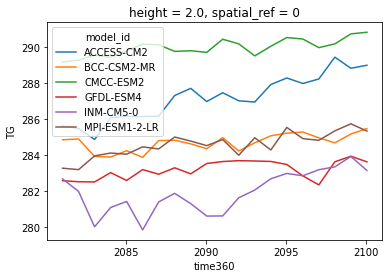

In [6]:
# Convert all calendars to annual precision (we have configured icclim to output yearly data)

ll = [to_360day_annual(da) for da in tg]
ll_hist = [to_360day_annual(da) for da in tg_hist]

# Concatenate all models into one
full_tg = xr.concat(ll, 'model_id', join='outer')

full_tg.plot(hue='model_id')

### Plot a time series